# Regression for denoising quasar spectra

In this problem, we will apply a supervised learning technique to estimate the *light spectrum of quasars*. 

Quasars are luminous distant galactic nuclei that are so bright, their light overwhelms that of stars in their galaxies. Understanding properties of the spectrum of light emitted by a quasar is useful for a number of tasks: 
1. A  number of quasar properties can be estimated from the spectra, 
2. Properties of the regions of the universe through which the light passes can also be evaluated (for example, we can estimate the density of neutral and ionized particles in the universe, which helps cosmologists understand the evolution and fundamental laws governing its structure).

The light spectrum is a curve that relates the light’s intensity (formally, lumens per square meter), or luminous flux, to its wavelength.

The Lyman-α wavelength is a wavelength beyond which intervening particles at most negligibly interfere with light emitted from the quasar. (Interference generally occurs when a photon is absorbed by a neutral hydrogen atom, which only occurs for certain wavelengths of light.) For
wavelengths greater than this Lyman-α wavelength, the observed light spectrum f obs can be modeled as a smooth spectrum f plus noise:

*f<sub>obs</sub>(λ) = f(λ) + noise(λ)*
                    
For wavelengths below the Lyman-α wavelength, a region of the spectrum known as the Lyman-α forest, intervening matter causes attenuation of the observed signal. As light emitted by the quasar travels through regions of the universe richer in neutral hydrogen, some of it is absorbed,
which we model as:

*f<sub>obs</sub>(λ) = absorption(λ) · f(λ) + noise(λ)*
            
Astrophysicists and cosmologists wish to understand the absorption function, which gives information about the Lyman-α forest, and hence the distribution of neutral hydrogen in otherwise unreachable regions of the universe. This gives clues toward the formation and evolution of the
universe. Thus, it is our goal to estimate the spectrum f of an observed quasar.

Input Files:
1. Training set: ./quasar_train.csv
2. Test set:     ./quasar_test.csv

Each file contains a single header row containing 450 numbers corresponding integral wavelengths in the interval [1150, 1600] Å. The remaining lines contain relative flux measurements for each wavelength. Specifically, quasar train.csv contains 200 examples and quasar test.csv contains 50 examples.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from LocallyWeightedRegression import LWregressor

%matplotlib inline

In [2]:
df_train = pd.read_csv("quasar_train.csv")
df_train.columns = np.arange(1150, 1600)
df_test = pd.read_csv("quasar_test.csv")
df_test.columns = np.arange(1150, 1600)

print("Training Set shape: {}\nTest Set shape: {}".format(df_train.shape, df_test.shape))

Training Set shape: (200, 450)
Test Set shape: (50, 450)


In [3]:
print("Training Data:\n",df_train.head())

Training Data:
     1150   1151   1152   1153   1154   1155   1156   1157   1158   1159  ...  \
0  0.629  1.910  0.976  2.161  0.964  2.068  1.630  1.716  2.378 -0.540  ...   
1 -0.161  1.830  0.609  1.932  0.932  0.857  0.978  1.032  1.793  1.455  ...   
2 -0.085 -1.304  0.691 -0.800 -1.090  1.087  0.734  1.198  1.122  0.742  ...   
3  1.283 -0.487  0.660  0.167 -1.217  1.535  2.264  0.220  0.865 -0.723  ...   
4 -0.107  0.328  0.681  2.500  0.083  1.876  2.359  1.122  0.584  0.835  ...   

    1590   1591   1592   1593   1594   1595   1596   1597   1598   1599  
0  0.532  1.462  0.323  2.515  1.194  0.654  1.056  1.450  0.203  0.382  
1  0.961  1.407  1.296  0.943  1.055  2.265  1.053  1.439  0.767 -0.552  
2  0.447  1.139  0.422  1.248  1.047  0.500  1.514  1.623  1.202  0.924  
3  0.714  1.173  1.579  0.477  0.781  0.525  2.466  1.493  1.503  0.698  
4  1.427  2.685  1.152  1.365  0.280  2.246  1.249  1.304  0.578  0.831  

[5 rows x 450 columns]


In [4]:
print("Test data:\n", df_test.head())

Test data:
     1150   1151   1152  1153   1154   1155   1156   1157  1158   1159  ...  \
0  0.025  1.460 -0.057  1.37  2.090  1.150 -0.182  0.351  1.57  1.970  ...   
1  1.210  0.375  0.695 -0.09  0.275 -0.128  0.043 -0.054  1.40  1.950  ...   
2  1.380 -0.436  2.700  1.18  1.850  0.374  2.290  1.110  1.06  1.270  ...   
3  0.427  0.509  1.060  0.80  0.537  0.288  2.790  2.120  1.51 -0.937  ...   
4 -0.371  0.773 -0.621  1.84  0.284 -0.009  1.910  1.900  1.64  0.803  ...   

    1590   1591   1592   1593   1594  1595   1596   1597   1598   1599  
0  0.525  0.574  1.570  1.280  0.963  1.04  1.160  0.555  0.733  1.180  
1  0.658  0.579  1.670  1.230  1.230  1.19  1.220  0.932  1.280  0.338  
2  0.672  0.483  1.350  1.450  2.810  1.28  0.893  1.980  0.744  0.610  
3  0.928  1.020  0.462  1.040  1.070  1.64  1.250  0.706  0.673  1.480  
4  1.240  0.867  1.460  0.035  1.880  1.74 -0.225  0.711 -0.571  0.786  

[5 rows x 450 columns]


In [5]:
X = df_train.columns.values
y = df_train.iloc[0].values

X = np.reshape(X, newshape = (len(X), 1))
X = np.hstack([np.ones((len(X), 1)), X]).astype(int)

#### Linear Regression on first training data (unweighted) 

In [6]:
unweighted = LWregressor()
unweighted.fit(X, y)

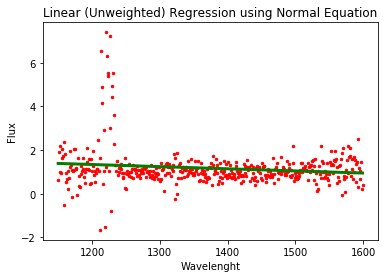

In [7]:
y_pred = unweighted.predict(type_reg = "unweighted")

unweighted.visualize(X[:, 1], y_pred, title = "Linear (Unweighted) Regression using Normal Equation", \
                    xlabel = "Wavelenght", ylabel = "Flux")

In [8]:
print("Theta: {}".format(unweighted.theta))

Theta: [ 2.51339906e+00 -9.81122145e-04]


#### Locally Weighted Regression on first training data varying bandwidth parameter

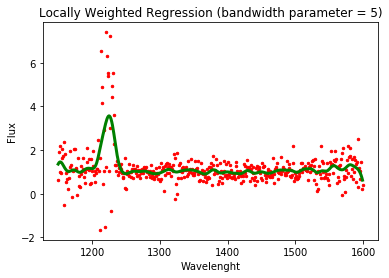

In [9]:
weighted = LWregressor(bandwidth_parameter = 5)
weighted.fit(X, y)

y_pred = np.array([])
for idx, x in enumerate(X):
    y_ = weighted.predict(x, type_reg = "weighted")
    y_pred = np.append(y_pred, y_)
unweighted.visualize(X[:, 1], y_pred, title = "Locally Weighted Regression (bandwidth parameter = {})".format(weighted.bandwidth_parameter), \
                    xlabel = "Wavelenght", ylabel = "Flux")

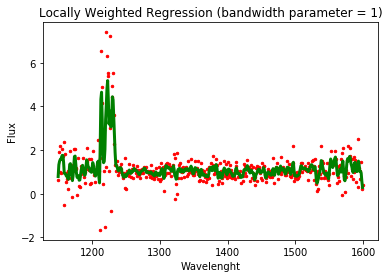

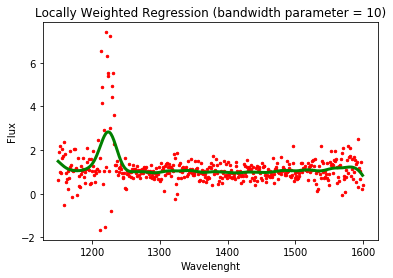

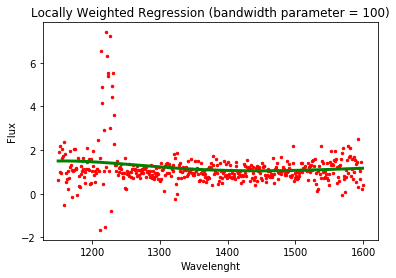

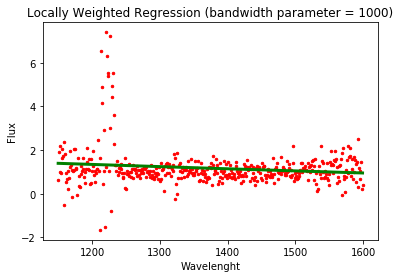

In [10]:
for tau in [1, 10, 100, 1000]:
    weighted = LWregressor(bandwidth_parameter = tau)
    weighted.fit(X, y)

    y_pred = np.array([])
    for idx, x in enumerate(X):
        y_ = weighted.predict(x, type_reg = "weighted")
        y_pred = np.append(y_pred, y_)
    unweighted.visualize(X[:, 1], y_pred, title = "Locally Weighted Regression (bandwidth parameter = {})".format(weighted.bandwidth_parameter), \
                        xlabel = "Wavelenght", ylabel = "Flux")

In [33]:
y_train = df_train.values.T
y_test = df_test.values.T

In [46]:
def smoothen(X, y, tau):
    y_pred = np.empty(y.shape)
    for i in range(y.shape[1]):
        lr = LWregressor(bandwidth_parameter = tau)
        lr.fit(X, y[:, i])
        for j, x in enumerate(X):
            y_pred[j, i] = lr.predict(x, type_reg = "weighted")
        print("{} has been done.".format(i+1))
    return y_pred

In [47]:
y_train_smooth = smoothen(X, y_train, 5)

1 has been done.
2 has been done.
3 has been done.
4 has been done.
5 has been done.
6 has been done.
7 has been done.
8 has been done.
9 has been done.
10 has been done.
11 has been done.
12 has been done.
13 has been done.
14 has been done.
15 has been done.
16 has been done.
17 has been done.
18 has been done.
19 has been done.
20 has been done.
21 has been done.
22 has been done.
23 has been done.
24 has been done.
25 has been done.
26 has been done.
27 has been done.
28 has been done.
29 has been done.
30 has been done.
31 has been done.
32 has been done.
33 has been done.
34 has been done.
35 has been done.
36 has been done.
37 has been done.
38 has been done.
39 has been done.
40 has been done.
41 has been done.
42 has been done.
43 has been done.
44 has been done.
45 has been done.
46 has been done.
47 has been done.
48 has been done.
49 has been done.
50 has been done.
51 has been done.
52 has been done.
53 has been done.
54 has been done.
55 has been done.
56 has been done.
5

In [48]:
y_test_smooth = smoothen(X, y_test, 5)

1 has been done.
2 has been done.
3 has been done.
4 has been done.
5 has been done.
6 has been done.
7 has been done.
8 has been done.
9 has been done.
10 has been done.
11 has been done.
12 has been done.
13 has been done.
14 has been done.
15 has been done.
16 has been done.
17 has been done.
18 has been done.
19 has been done.
20 has been done.
21 has been done.
22 has been done.
23 has been done.
24 has been done.
25 has been done.
26 has been done.
27 has been done.
28 has been done.
29 has been done.
30 has been done.
31 has been done.
32 has been done.
33 has been done.
34 has been done.
35 has been done.
36 has been done.
37 has been done.
38 has been done.
39 has been done.
40 has been done.
41 has been done.
42 has been done.
43 has been done.
44 has been done.
45 has been done.
46 has been done.
47 has been done.
48 has been done.
49 has been done.
50 has been done.
